# NY Airbnb Data Analysis Capstone Project

For this project we will explore different analysis for Airbnb travel in New York City by looking at the following:

#Top City rentals

#Rental prices by city and room type

#Cities with rooms priced over and under $100

#Average minimum night stays 




In [1]:
# Import Analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from numpy.random import randn
np.random.seed(123)

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

# Analysis/Clean Up

In [3]:
# Function to show imported data

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
# Function used to describe the data

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Function used to show column and row counts

df.shape

(48895, 16)

In [6]:
# Function used to list column counts

df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [7]:
# Dropping of N/A data

df = df.dropna()

In [8]:
# Data Count after dropping duplicate data
df.count()

id                                38821
name                              38821
host_id                           38821
host_name                         38821
neighbourhood_group               38821
neighbourhood                     38821
latitude                          38821
longitude                         38821
room_type                         38821
price                             38821
minimum_nights                    38821
number_of_reviews                 38821
last_review                       38821
reviews_per_month                 38821
calculated_host_listings_count    38821
availability_365                  38821
dtype: int64

In [9]:
# Fuction to drop specific columns

drop_cols = ['id','number_of_reviews','last_review','reviews_per_month']
df.drop(drop_cols,inplace=True,axis=1)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
# Data after coulmns were dropped

df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129


In [11]:
# Function to rename columns

df=df.rename(columns={'name':'Room Name','host_id':'Host ID','host_name':'Host Name','neighbourhood_group':'City','neighbourhood':'Neighbourhood','room_type':'Room Type','price':'Price','minimum_nights':'Min Nights','calculated_host_listings_count':'Listing Count','availability_365':'Days Available','latitude':'Latitude','longitude':'Longitude'})

In [12]:
# Data after columns were renamed

df.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129


In [13]:
# New dataframe to show minimum nights <=3

df2 = df[df['Min Nights']<=3]

In [14]:
# DF2 results for Mininum Nights <=3

df2.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,1,220


In [15]:
# Grouping of Min Nights by average

df2.groupby(['Min Nights'])['Min Nights'].median() 

Min Nights
1    1
2    2
3    3
Name: Min Nights, dtype: int64

In [16]:
# Function adding nights column to existing data as daily

df2['Nights']="Daily"

<ipython-input-16-763eecf3ae27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nights']="Daily"


In [17]:
# Results after adding Nights column

df2.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,Daily
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355,Daily
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194,Daily
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129,Daily
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,1,220,Daily


In [18]:
# New dataframe to show minimum nights <=8

df3 = df[(df['Min Nights'] >3) & (df['Min Nights'] <=8)]

In [19]:
# DF3 results for Mininum Nights <=8

df3.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
10,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,1,6
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,3,314
32,Loft in Williamsburg Area w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72219,-73.93762,Private room,55,4,3,284
35,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,3,340
42,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,1,311


In [20]:
# Function adding nights column to existing data as weekly

df3['Nights']="Weekly"

<ipython-input-20-a5f4aeb1fc04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Nights']="Weekly"


In [21]:
# Results after adding Nights column to existing data as weekly

df3.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
10,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,1,6,Weekly
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,3,314,Weekly
32,Loft in Williamsburg Area w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72219,-73.93762,Private room,55,4,3,284,Weekly
35,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,3,340,Weekly
42,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,1,311,Weekly


In [22]:
# New dataframe to show minimum nights <=30

df4 = df[(df['Min Nights'] >7) & (df['Min Nights'] <=30)]

In [23]:
# DF4 results for Mininum Nights <=30

df4.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
27,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,40.76715,-73.98533,Entire home/apt,150,10,1,75
29,Modern 1 BR / NYC / EAST VILLAGE,21904,Dana,Manhattan,East Village,40.72920,-73.98542,Entire home/apt,180,14,1,67
45,Entire apartment in central Brooklyn neighborh...,49670,Rana,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,1,95
55,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,1,30


In [24]:
# Function adding nights column to existing data as monthly

df4['Nights']="Monthly"

<ipython-input-24-7970fed181e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Nights']="Monthly"


In [25]:
# Results after adding Nights column to existing data as monthly

df4.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0,Monthly
27,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,40.76715,-73.98533,Entire home/apt,150,10,1,75,Monthly
29,Modern 1 BR / NYC / EAST VILLAGE,21904,Dana,Manhattan,East Village,40.72920,-73.98542,Entire home/apt,180,14,1,67,Monthly
45,Entire apartment in central Brooklyn neighborh...,49670,Rana,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,1,95,Monthly
55,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,1,30,Monthly


In [26]:
# New dataframe to show minimum nights <=90

df5 = df[(df['Min Nights'] >30) & (df['Min Nights'] <=90)]

In [27]:
# DF3 results for Mininum Nights <=90

df5.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,1,0
14,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,1,0
81,Spacious luminous apt Upper West NYC,73051,Sybilla,Manhattan,Harlem,40.82915,-73.95136,Entire home/apt,110,31,1,209
106,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,2,137
155,"Sunny, clean 1 bdrm in W. Village",158284,Karene,Manhattan,West Village,40.73226,-74.00401,Entire home/apt,225,45,1,312


In [28]:
# Function adding nights column to existing data as quarterly

df5['Nights']="Quarterly"

<ipython-input-28-47e90e3ab533>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Nights']="Quarterly"


In [29]:
# Results after adding Nights column to existing data as quarterly

df5.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,1,0,Quarterly
14,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,1,0,Quarterly
81,Spacious luminous apt Upper West NYC,73051,Sybilla,Manhattan,Harlem,40.82915,-73.95136,Entire home/apt,110,31,1,209,Quarterly
106,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,2,137,Quarterly
155,"Sunny, clean 1 bdrm in W. Village",158284,Karene,Manhattan,West Village,40.73226,-74.00401,Entire home/apt,225,45,1,312,Quarterly


In [30]:
# Results after adding Nights column to existing data as quarterly

df6 = df[(df['Min Nights'] >90) & (df['Min Nights'] <=180)]

In [31]:
# DF6 results for Mininum Nights <=180

df6.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,1,180
667,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,1,204
719,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,1,0
757,1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.,1423613,Arthur,Manhattan,Washington Heights,40.85774,-73.92901,Entire home/apt,56,122,1,216
769,Nights in White Satin in the Slope,1440691,Dena,Brooklyn,Sunset Park,40.65992,-73.99042,Entire home/apt,127,180,1,365


In [32]:
# Function adding nights column to existing data as half year

df6['Nights']="Half Year"

<ipython-input-32-dac499f24d0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Nights']="Half Year"


In [33]:
# Results after adding Nights column to existing data as half year

df6.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,1,180,Half Year
667,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,1,204,Half Year
719,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,1,0,Half Year
757,1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.,1423613,Arthur,Manhattan,Washington Heights,40.85774,-73.92901,Entire home/apt,56,122,1,216,Half Year
769,Nights in White Satin in the Slope,1440691,Dena,Brooklyn,Sunset Park,40.65992,-73.99042,Entire home/apt,127,180,1,365,Half Year


In [34]:
# New dataframe to show minimum nights <=270

df7 = df[(df['Min Nights'] >90) & (df['Min Nights'] <=270)]

In [35]:
# DF7 results for Mininum Nights <=270

df7.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,1,180
245,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,1,140
667,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,1,204
719,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,1,0
757,1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.,1423613,Arthur,Manhattan,Washington Heights,40.85774,-73.92901,Entire home/apt,56,122,1,216


In [36]:
# Function adding nights column to existing data as nine months

df7['Nights']="Nine Months"

<ipython-input-36-022abd02b23f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Nights']="Nine Months"


In [37]:
# Results after adding Nights column to existing data as nine months

df7.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,1,180,Nine Months
245,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,1,140,Nine Months
667,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,1,204,Nine Months
719,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,1,0,Nine Months
757,1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.,1423613,Arthur,Manhattan,Washington Heights,40.85774,-73.92901,Entire home/apt,56,122,1,216,Nine Months


In [38]:
# New dataframe to show minimum nights <=365

df8 = df[(df['Min Nights'] >270) & (df['Min Nights'] <=365)]

In [39]:
# DF8 results for Mininum Nights <=365

df8.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available
700,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,1,0
754,"Easy, comfortable studio in Midtown",1387370,James,Manhattan,Midtown,40.75282,-73.97315,Entire home/apt,125,365,1,365
1758,Prospect Park Modern 3 Bedroom,4185135,David,Brooklyn,Windsor Terrace,40.65875,-73.97660,Entire home/apt,225,300,2,0
2150,Park Slope Pre-War Apartment,4000059,Shahdiya,Brooklyn,Park Slope,40.67359,-73.97434,Entire home/apt,100,365,1,365
2214,"Lovely studio in Manhattan,New York",5709288,Fabia,Manhattan,Midtown,40.75879,-73.96380,Entire home/apt,220,360,1,0


In [40]:
# Function adding nights column to existing data as yearly

df8['Nights']="Yearly"

<ipython-input-40-c8b261df34d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Nights']="Yearly"


In [41]:
# Results after adding Nights column to existing data as yearly

df8.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
700,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,1,0,Yearly
754,"Easy, comfortable studio in Midtown",1387370,James,Manhattan,Midtown,40.75282,-73.97315,Entire home/apt,125,365,1,365,Yearly
1758,Prospect Park Modern 3 Bedroom,4185135,David,Brooklyn,Windsor Terrace,40.65875,-73.97660,Entire home/apt,225,300,2,0,Yearly
2150,Park Slope Pre-War Apartment,4000059,Shahdiya,Brooklyn,Park Slope,40.67359,-73.97434,Entire home/apt,100,365,1,365,Yearly
2214,"Lovely studio in Manhattan,New York",5709288,Fabia,Manhattan,Midtown,40.75879,-73.96380,Entire home/apt,220,360,1,0,Yearly


In [42]:
# Data Clean dataframe

CleanData = pd.concat([df2, df3,df4,df5,df6,df7,df8])

In [43]:
# Data Clean dataframe results

CleanData.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,Daily
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355,Daily
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194,Daily
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129,Daily
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,1,220,Daily


# Group By Analysis

In [44]:
# Grouping function by listing count by  Host ID

CleanData.groupby(['Host ID'])['Listing Count'].count()

Host ID
2438         1
2571         1
2787         6
2845         2
2868         1
            ..
272557707    1
272816114    1
272872092    1
273361532    1
273841667    1
Name: Listing Count, Length: 30227, dtype: int64

In [45]:
# Grouping function by listing count by city

CleanData.groupby(['City'])['Listing Count'].count()

City
Bronx              875
Brooklyn         16503
Manhattan        16707
Queens            4574
Staten Island      314
Name: Listing Count, dtype: int64

In [46]:
# Grouping function by price by city

CleanData.groupby(['City'])['Price'].median()

City
Bronx             65
Brooklyn          94
Manhattan        140
Queens            72
Staten Island     75
Name: Price, dtype: int64

In [47]:
# Grouping function by price by city

CleanData.groupby(['City'])['Min Nights'].median()

City
Bronx            2
Brooklyn         2
Manhattan        3
Queens           2
Staten Island    2
Name: Min Nights, dtype: int64

In [48]:
# Grouping function by minimum nights by room type

CleanData.groupby(['Room Type'])['Min Nights'].median()

Room Type
Entire home/apt    3
Private room       2
Shared room        1
Name: Min Nights, dtype: int64

In [49]:
# Grouping function by price by room type

CleanData.groupby(['Room Type'])['Price'].median()

Room Type
Entire home/apt    151
Private room        70
Shared room         45
Name: Price, dtype: int64

# Analysis Graphs

In [50]:
# Cleaned data sorting funtion

CleanData=CleanData.sort_values('Min Nights')

In [51]:
CleanData.head()

,Room Name,Host ID,Host Name,City,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,Listing Count,Days Available,Nights
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,Daily
21408,RF - Budget Friendly room in the Greenpoint Area!,11612872,Robert,Brooklyn,Greenpoint,40.73571,-73.95372,Private room,55,1,3,9,Daily
21411,Comfy Bedroom in Bushwick (3mins from Train),9439324,Chérie,Brooklyn,Bushwick,40.68699,-73.90560,Private room,46,1,3,0,Daily
41868,"Quiet & Elegant, 30 mins to midtown Manhattan!",56403037,Jane,Queens,Woodhaven,40.68899,-73.85001,Shared room,35,1,3,53,Daily
21417,"15 Minutes to Manhattan, Heart of Astoria",2350326,Ero,Queens,Ditmars Steinway,40.77811,-73.91065,Private room,70,1,2,31,Daily


<AxesSubplot:title={'center':'Minimum Nights by City And Room Type'}, xlabel='City', ylabel='Min Nights'>

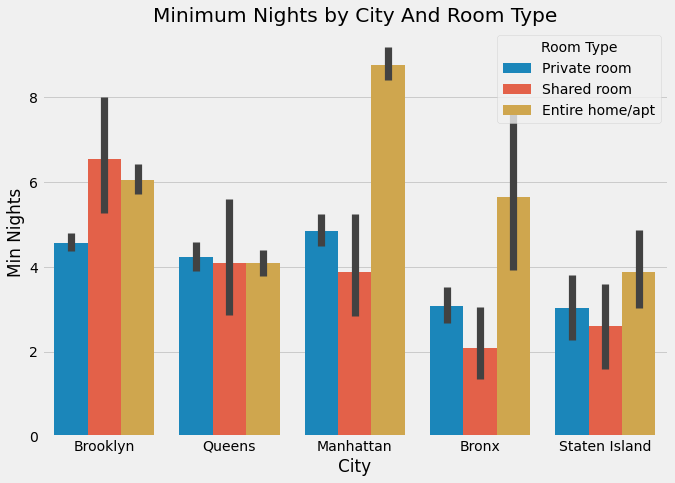

In [62]:
#Bargraph showing minimum nights by city and room type

plt.figure(figsize=[10,7])
plt.title('Minimum Nights by City And Room Type')
sns.barplot(x='City', y='Min Nights',hue='Room Type',data = CleanData)

<AxesSubplot:title={'center':'Pricing By Room Type and City'}, xlabel='City', ylabel='Price'>

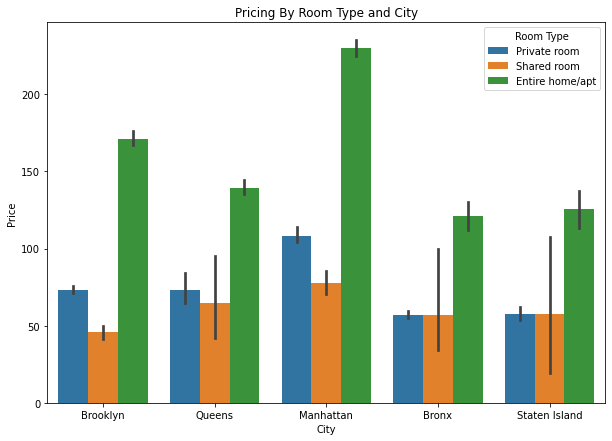

In [53]:
#Bargraph showing price by city and room type

plt.figure(figsize=[10,7])
plt.title('Pricing By Room Type and City')
sns.barplot(x='City', y='Price',hue='Room Type',data = CleanData)

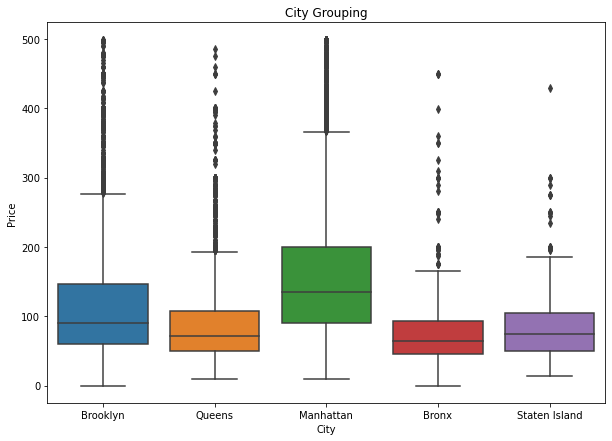

In [54]:
#Boxplot grouping price by city 

plt.figure(figsize=(10,7))
plt.title('City Grouping')

sns.boxplot(y='Price',x='City',data=CleanData[CleanData.Price<500])

plt.show()

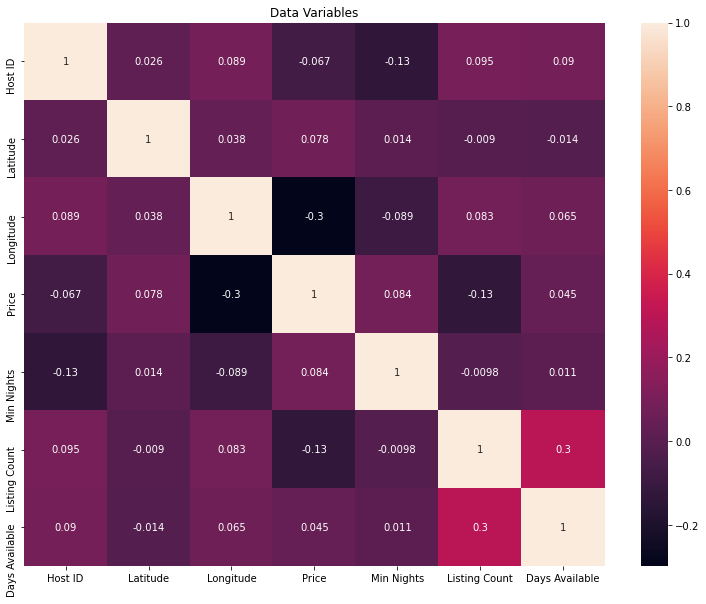

In [55]:
#Heatmap showing variables of the data

corr =CleanData.corr(method='kendall')
plt.figure(figsize=(13,10))

plt.title('Data Variables')
sns.heatmap(corr,annot=True)

plt.show()

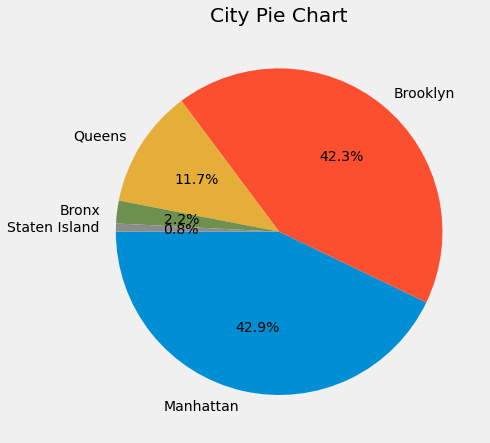

In [56]:
#Pie chart showing cities occupancy %

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
plt.title ('City Pie Chart')

g=plt.pie(CleanData.City.value_counts(),labels=CleanData.City.value_counts().index,autopct='%1.1f%%',startangle=180)

plt.show()

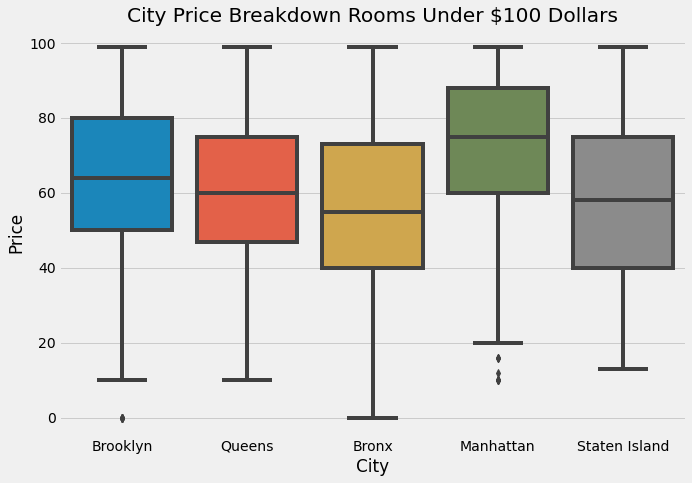

In [57]:
#Boxplot showing room pricess under $100 by city

plt.figure(figsize=(10,7))

plt.title('City Price Breakdown Rooms Under $100 Dollars')

sns.boxplot(y='Price',x='City',data=CleanData[CleanData.Price<100])

plt.show()

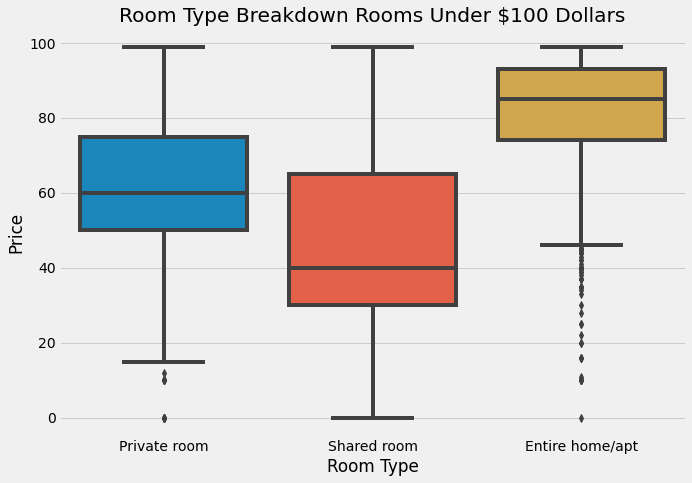

In [58]:
#Boxplot showing room pricess under $100 by city

plt.figure(figsize=(10,7))

plt.title('Room Type Breakdown Rooms Under $100 Dollars')

sns.boxplot(y='Price',x='Room Type',data=CleanData[CleanData.Price<100])

plt.show()

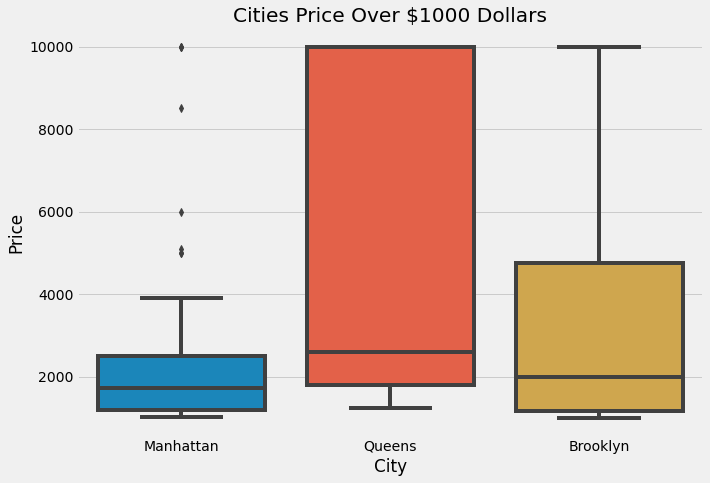

In [59]:
#Boxplot showing room pricess over $1000 by room type

plt.figure(figsize=(10,7))

plt.title('Cities Price Over $1000 Dollars')

sns.boxplot(y='Price',x='City',data=CleanData[CleanData.Price>1000])

plt.show()

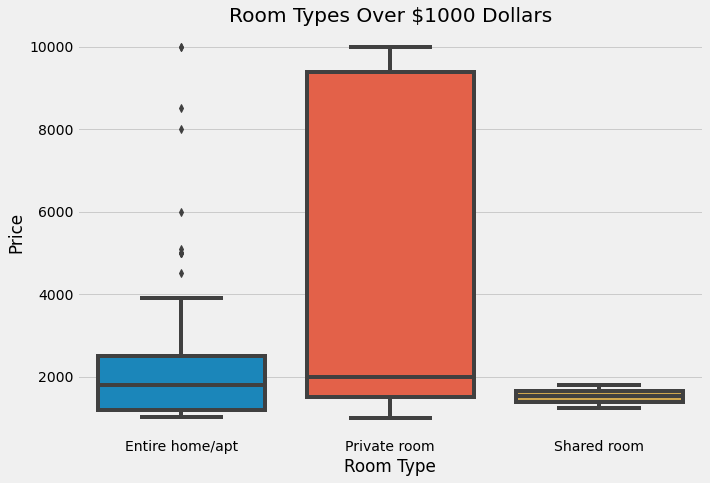

In [60]:
#Boxplot showing room pricess over $1000 by room type

plt.figure(figsize=(10,7))

plt.title('Room Types Over $1000 Dollars')

sns.boxplot(y='Price',x='Room Type',data=CleanData[CleanData.Price>1000])

plt.show()

In [61]:
#Function to export cleaned data to Excel

CleanData.to_excel(r'C:\Users\EColeman-Barton\OneDrive - Healthfirst\Desktop\New folder\CleanData.xlsx', index = False)